In [1]:
import pygmt
import netCDF4 as nc
import os,glob,warnings
import pandas as pd
warnings.filterwarnings("ignore")

In [2]:
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=[39, 47, 39, 45])

pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)


In [3]:
fault = '/Volumes/home/Research/DataBase/01_Armenia/00_smooth_fault_7.txt'
stafile = '/Volumes/home/Research/DataBase/01_Armenia/Station_info_2.csv'
df = pd.read_csv(stafile)
resultpath = '/Volumes/home/Research/STEP/02_Station_result_csv/2010-2020_*_classify'
remove  = '/Volumes/home/Research/STEP/05_Station_result_statistics/V4_Remove_catalog.txt'
dr = pd.read_csv(remove,sep='\s+',names=['station','time','phase','a','b','c','d','e','f','g'])

In [4]:
STAlist = ['BAUR','ARZA','TSAP','LICH','ALAV','ZARN','NAVR',
           'BYUR','GERK','KECH','VAND','MAGY','SHEN','GANJ',
           'QZX','TASB','GNI']

In [5]:
cmap = pygmt.makecpt(cmap='elevation',series=[0,5000],output='temp.cpt')

In [6]:
cmd = '''
gmt grdtrack -R43/46.7/39/41.3 -G@earth_relief_30s %(fault)s > faults.xyz
''' %locals()
os.system(cmd)

gmt [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)
grdtrack [WARNING]: Some input points were outside the grid domain(s).


0

ZARN 20180211_231415
VAND 20160729_211826
VAND 20180211_231415
VAND 20190731_150233
VAND 20200805_120536
GNI 20130514_003226
GNI 20200613_210830
GNI 20131123_074832


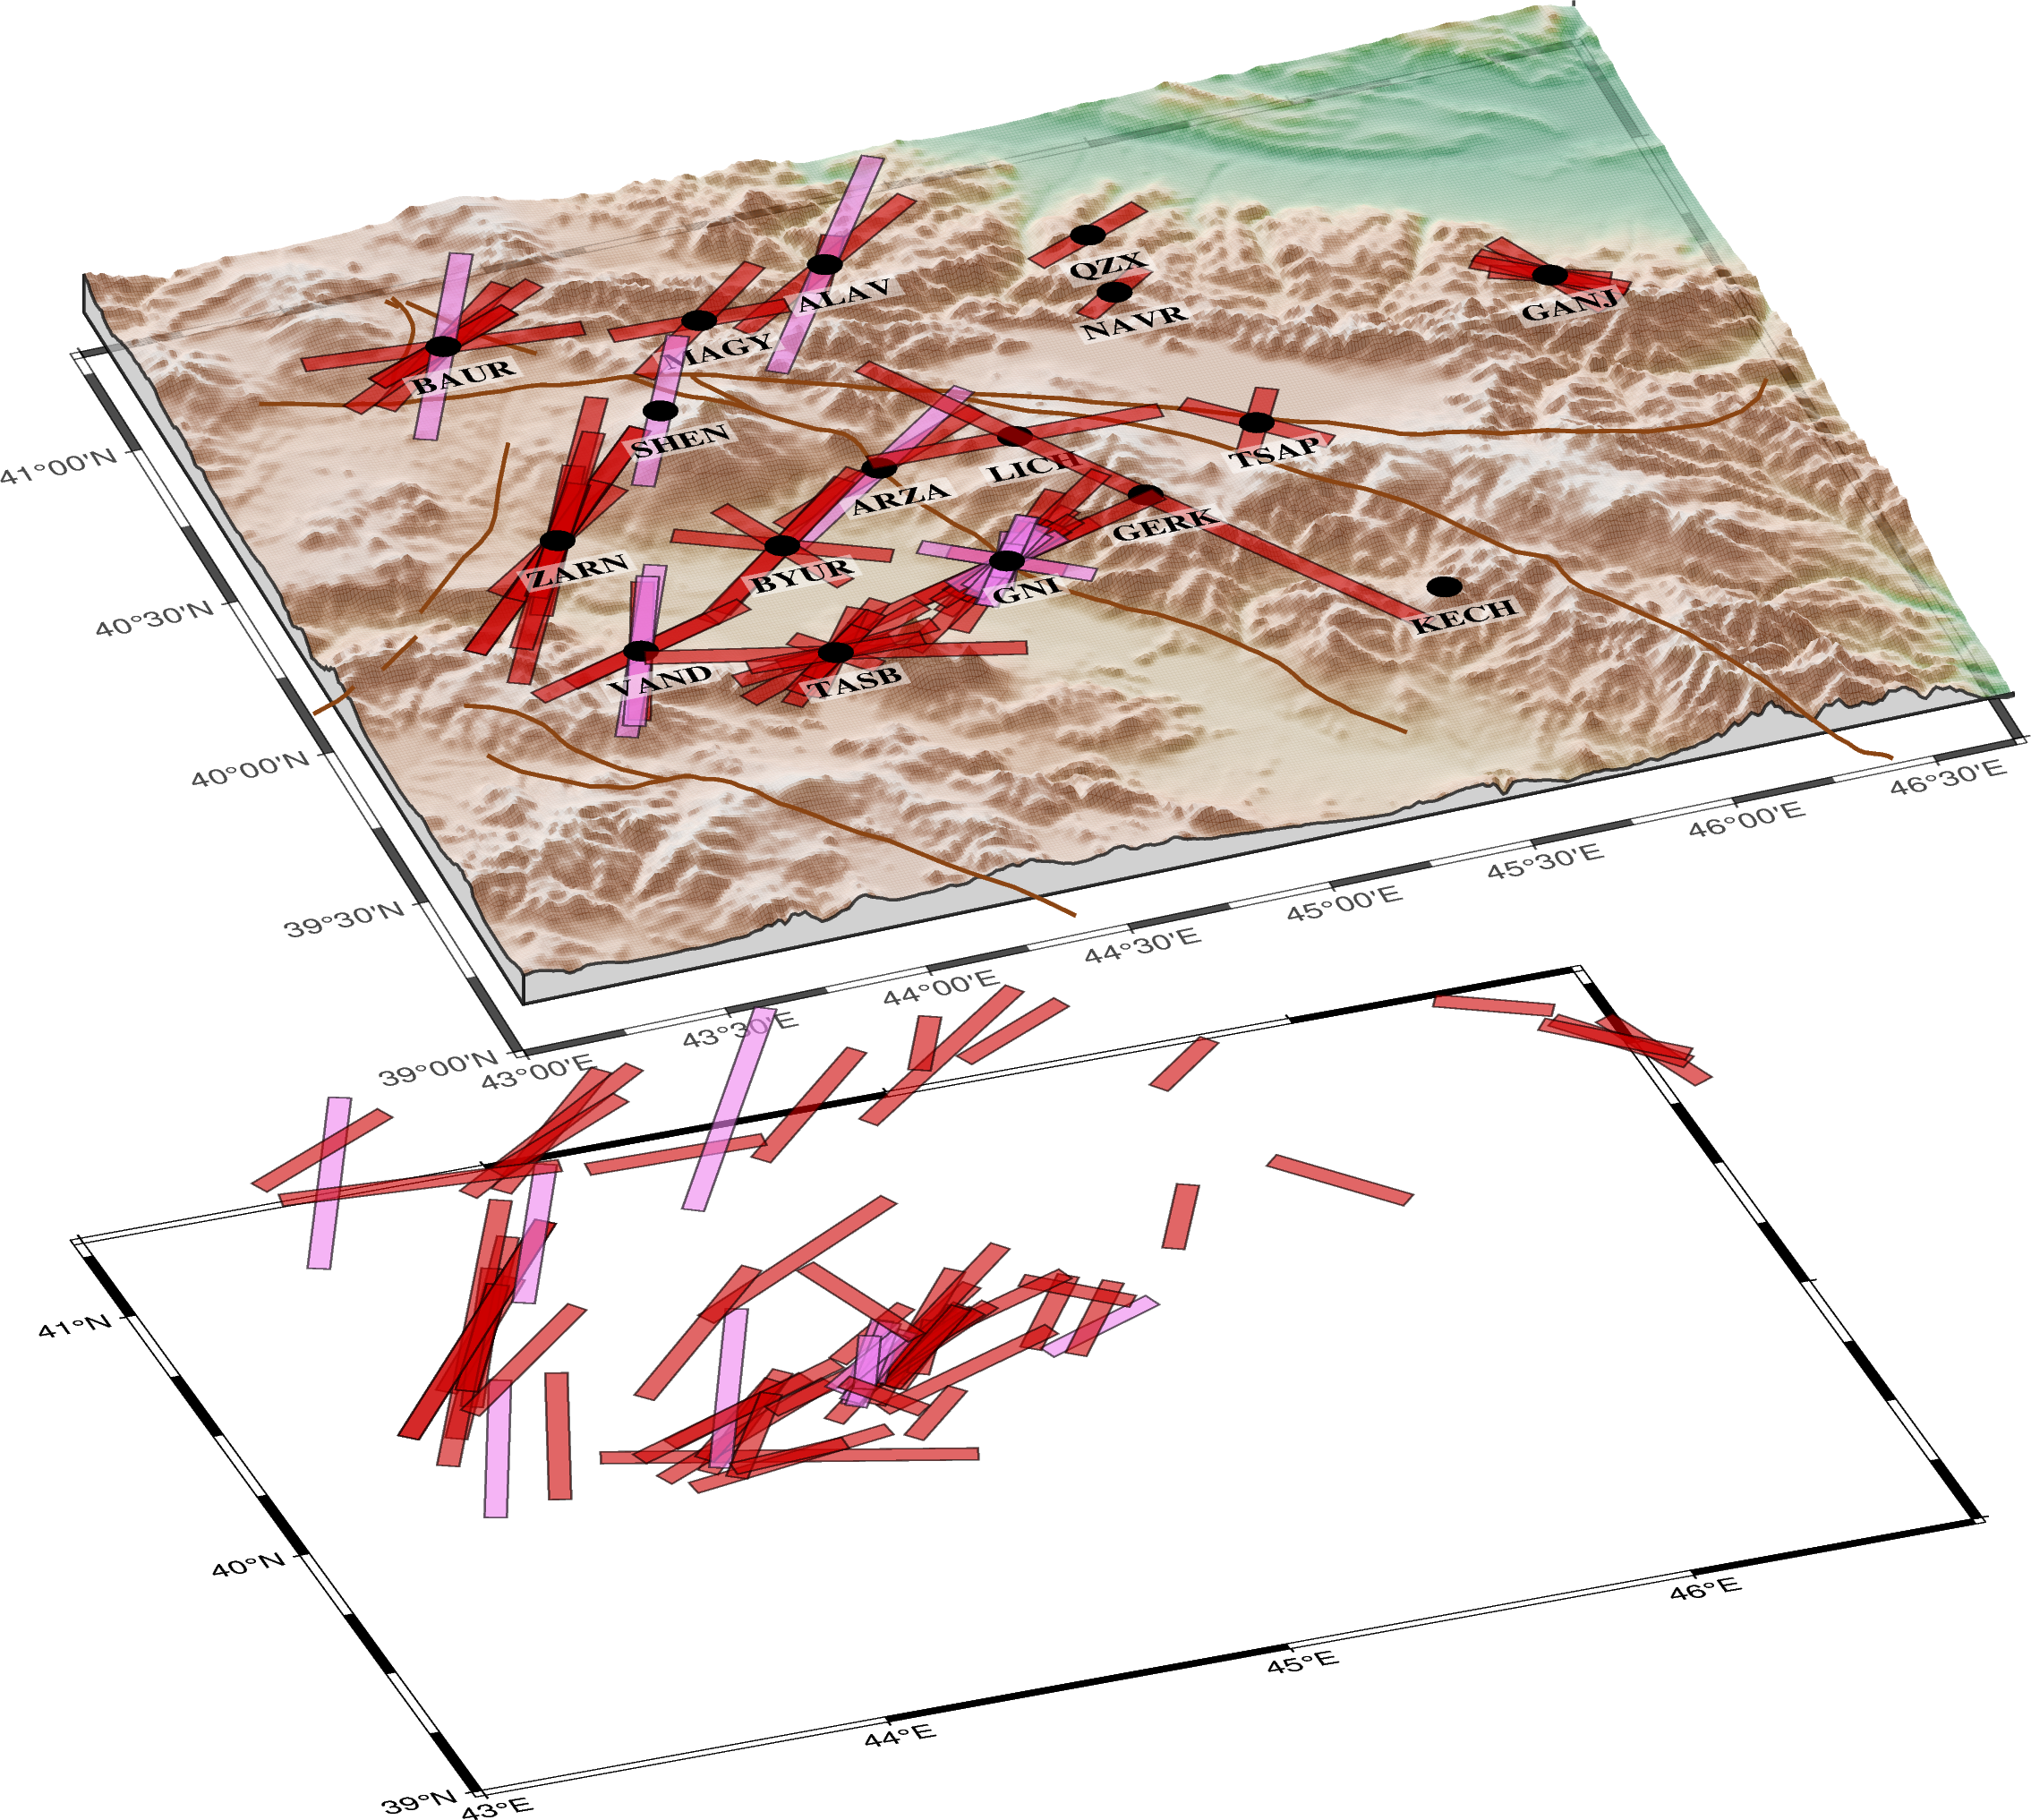

In [15]:
region = [43,46.7,39,41.3]
SKScolor='red3'; SKKScolor='violet'
fig = pygmt.Figure()
fig.grdview(
    grid=grid,
    region=region,
    perspective=[200, 35],
    shading = '+a0+nt1+m0',
    frame=["xa0.5f0.25", "ya0.5f0.25", "WSne"],
    projection="M15c",
    zsize="1.5c",
    surftype="s",
    cmap='temp.cpt',
    transparency=30,
    # Set the plane elevation to 1,000 meters and make the fill "gray"
    plane="500+ggray")
fig.plot3d('faults.xyz', pen='1p,139/69/19',perspective=[200, 35])

for i in range(len(df)):
    STA = df['station'].values[i]
    if STA in STAlist:
        lat = df['lat'].values[i]
        lon = df['lon'].values[i]
        
        for csvpath in glob.glob(f'{resultpath}/*{STA}*.csv'):
            dff = pd.read_csv(csvpath)
            dff = dff[dff['Pick']==True][dff['Null']==False]
            for j in range(len(dff)):
                event = dff['Event'].values[j]
                phase = dff['Phase'].values[j]
                if STA in dr['station'].to_list() and event in dr['time'].to_list():
                        print(f'{STA} {event}')
                else:
                    phi = dff['SCPhi'].values[j]
                    dt  = dff['SCdt'].values[j]
                    data = [[lon, lat, phi-90, 4.5, dt*40]]
                    
                    if phase == 'SKS':
                        cc=SKScolor
                    elif phase == 'SKKS':
                        cc=SKKScolor
                    fig.plot(data=data, style="J", color=cc, pen="0.5p,black", perspective='z200/35',transparency=40, no_clip=True)
        fig.plot(x=lon,y=lat,style='c0.3c',pen='1p,black',color='black', perspective='z200/35')
        fig.text(x=lon,y=lat-0.1,text=STA,font='10p,5',fill='white@50', perspective='z200/35')

        
fig.basemap(region = region, projection='J15c',
            frame=["xa", "yaf", "WSne"], 
            perspective='z200/30', yshift='-7c')

PPfile = '/Volumes/home/Research/STEP/12_PiercePoint/non-null/PP100.csv'
dpp = pd.read_csv(PPfile)

for k in range(len(dpp)):
    sta = dpp['station'].values[k]
    if sta in STAlist:
        phase = dpp['phase'].values[k]
        plon = dpp['plon'].values[k]
        plat = dpp['plat'].values[k]
        phi = dpp['phi'].values[k]
        dt  = dpp['dt'].values[k]
        data = [[plon, plat, phi-90, 4.5, dt*40]]

        if phase == 'SKS':
            cc=SKScolor
        elif phase == 'SKKS':
            cc=SKKScolor
        fig.plot(data=data, style="J", color=cc, pen="0.5p,black", perspective='z200/35',transparency=40, no_clip=True)

fig.show()

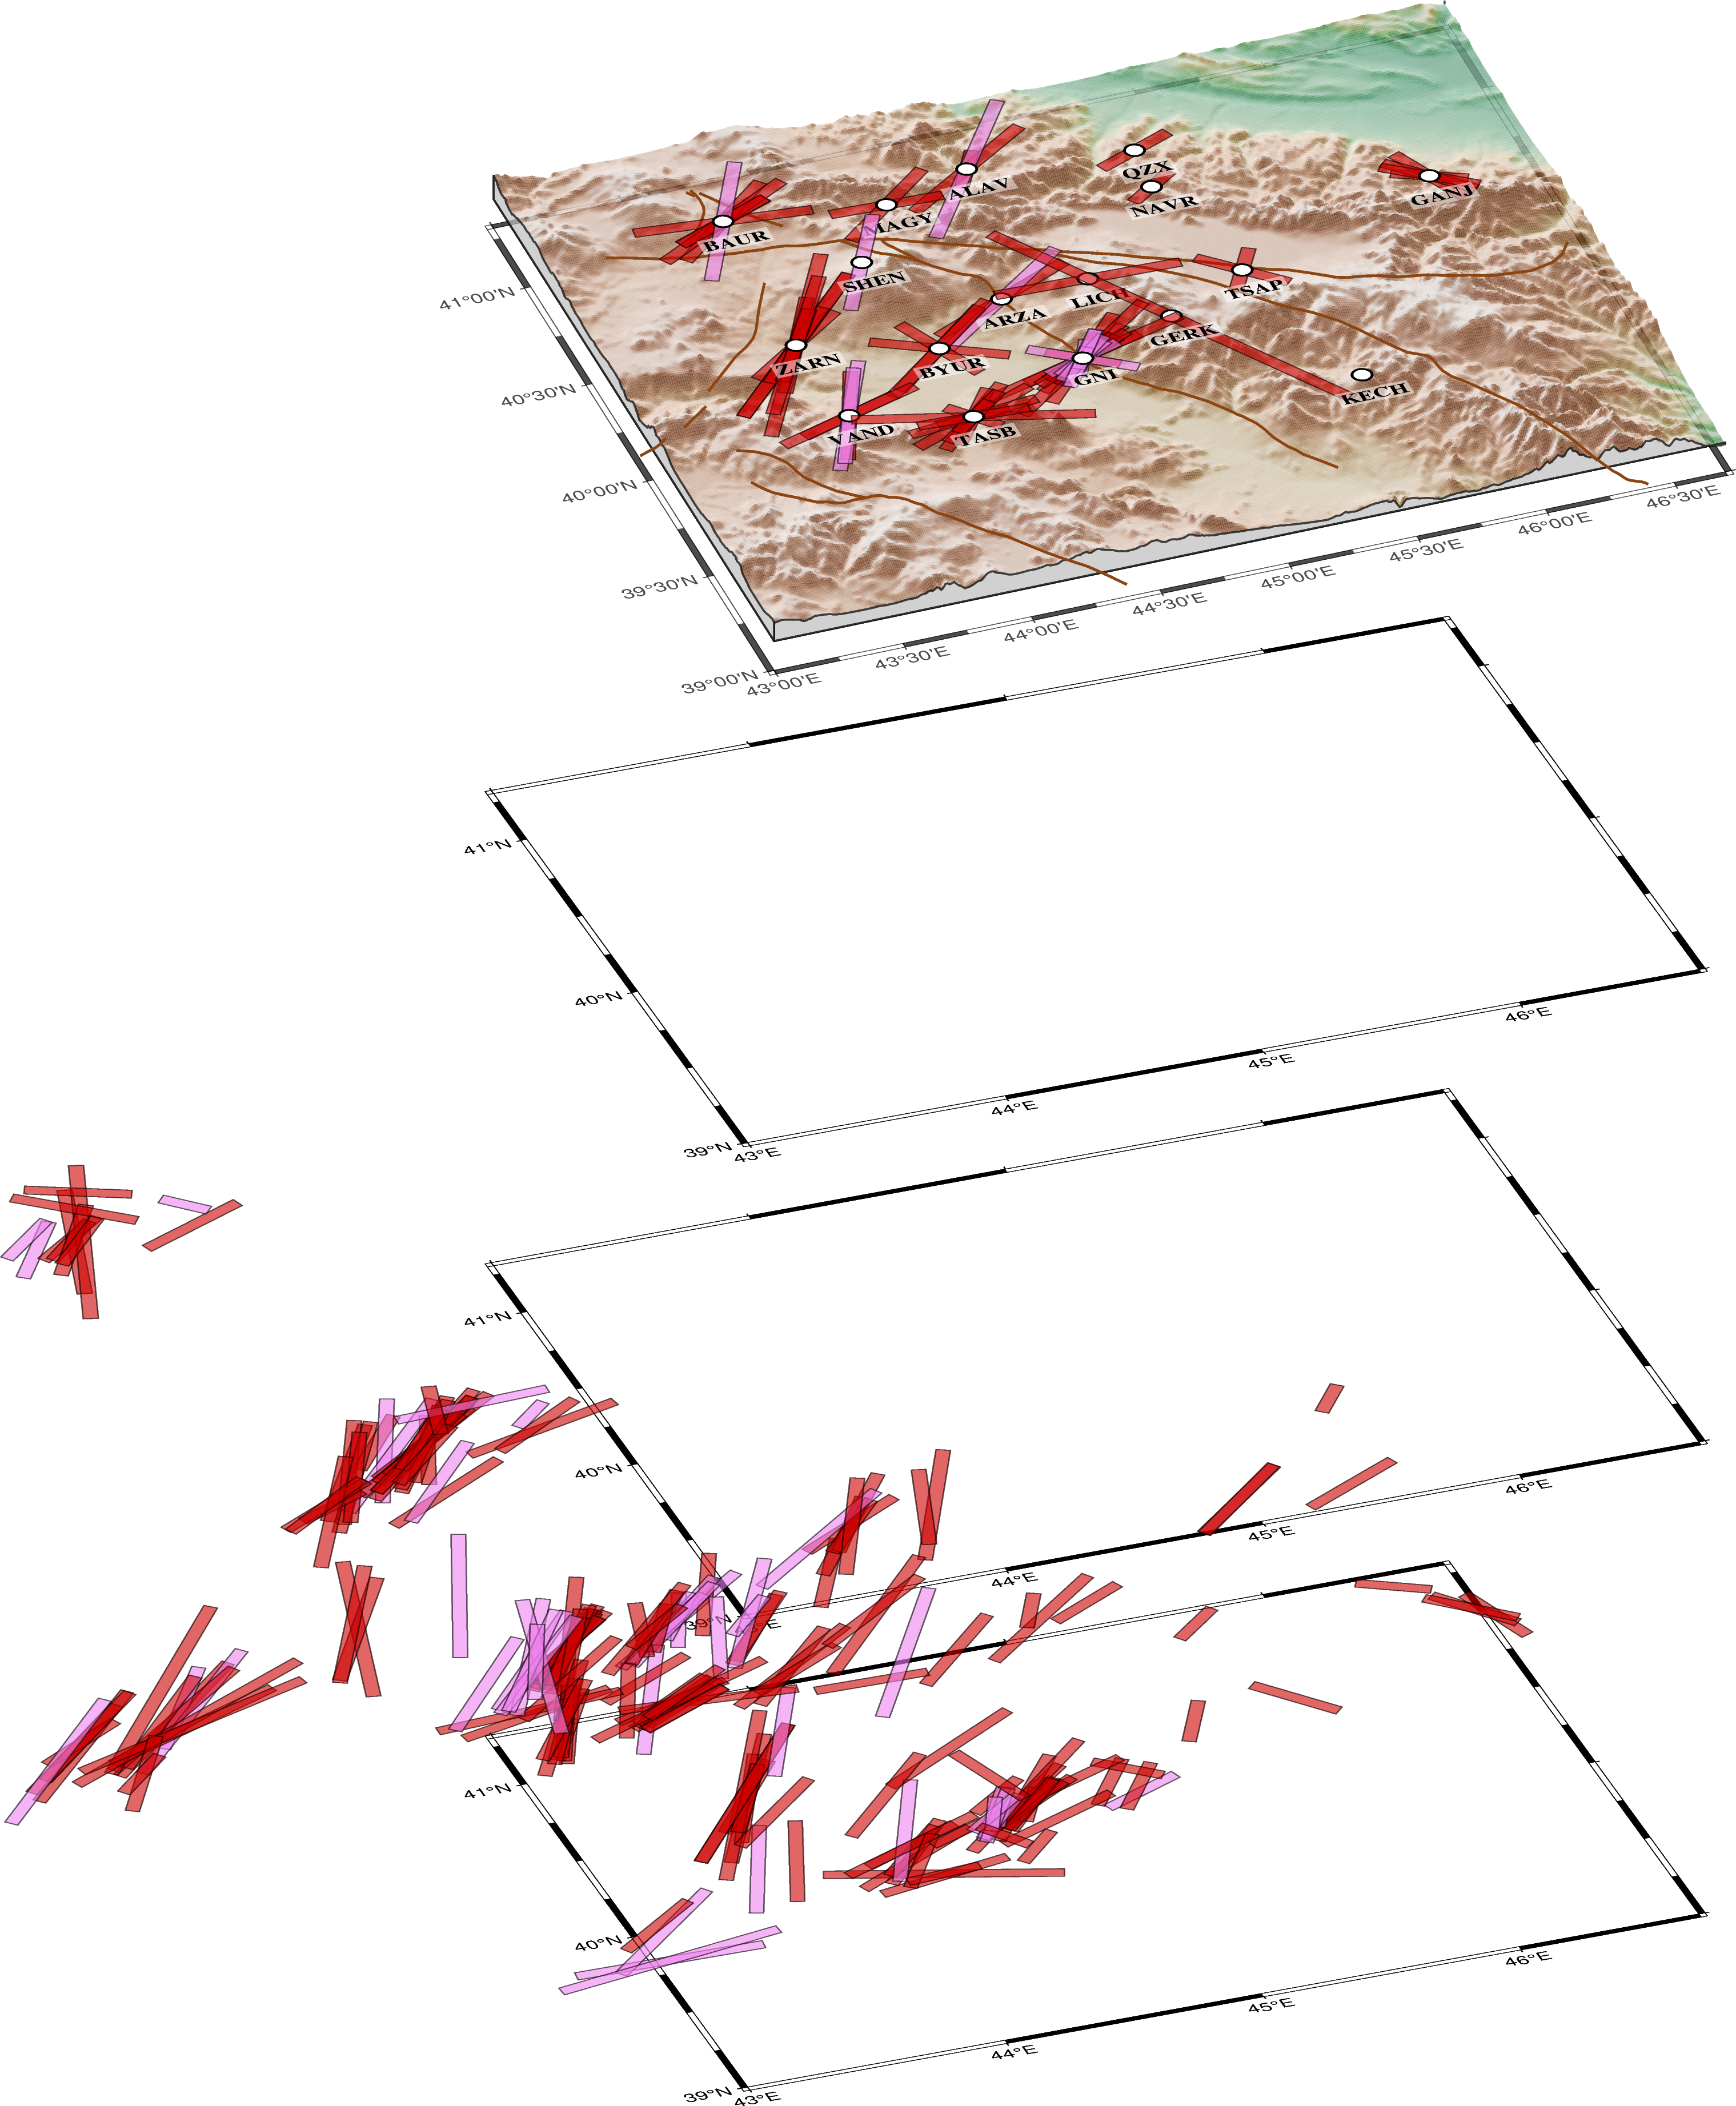

In [13]:
dpp

station phase   plon   plat    phi   dt  cluster
0      VAND   SKS  44.09  40.06  70.76  0.9        0
1      TASB   SKS  44.14  39.88 -72.72  1.9        0
2      TASB   SKS  44.09  40.02  45.98  1.0        0
3      TASB   SKS  44.08  39.99  66.18  1.2        0
4      TASB   SKS  44.08  40.03  50.08  0.8        0
..      ...   ...    ...    ...    ...  ...      ...
206     AKH   SKS  43.65  41.43  49.29  1.4       45
207     AKH   SKS  43.69  41.43  58.00  0.7       45
208    AZMN  SKKS  42.98  41.32  44.30  1.4       46
209    URAV  SKKS  43.54  42.73  89.89  1.2       47
210     ONI   SKS  43.40  42.74  13.00  0.7       47

[211 rows x 7 columns]